In [150]:
import numpy as np 
import matplotlib.pyplot as plt

## 1. Bootstrapping

In this problem, you'll compare the results of drawing $N = 5000$ means from the original distribution versus drawing $N = 5000$ means via bootstrapping.

Steps:

1. Draw $m = 20$ samples from the standard normal distribution.  
   - Compute their mean.
   - Repeat this process $N = 5000$ times.
   - Store all 5000 means in a vector `means_original`.

2. Draw another single set of $m = 20$ samples from the standard normal distribution.  
   - Generate $N = 5000$ **bootstrap samples** (samples of size $m$, drawn with replacement from the original 20).
   - Compute the mean of each bootstrap sample.
   - Store these means in a vector `means_bootstrap`.

3. Plot histograms of `means_original` and `means_bootstrap` **side by side**.  
   - In each plot, draw vertical lines at the mean and the 2.5% and 97.5% quantiles of the distribution.
   - Report the mean and the 95% confidence interval (i.e., the 2.5% and 97.5% quantiles) for each.

4. Repeat the above steps with $m = 100$.


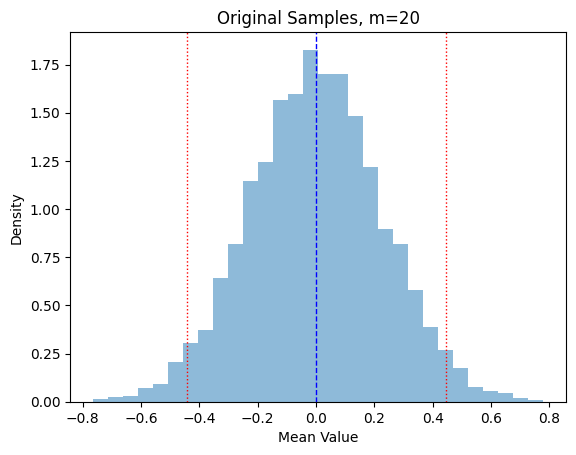

Original Mean: 0.0010, Q1: -0.4421, Q2: 0.4466


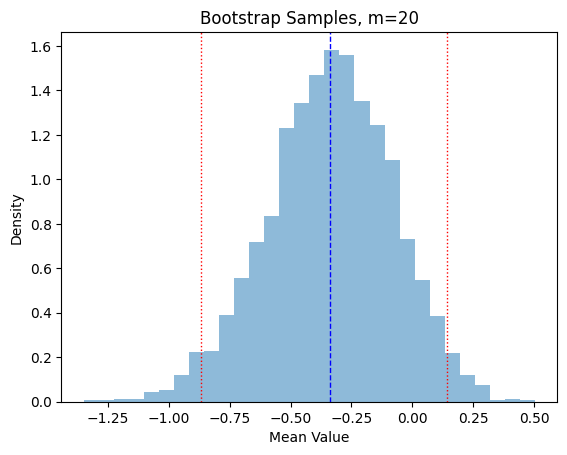

Bootstrap Mean: -0.3365, Q1: -0.8684, Q2: 0.1422


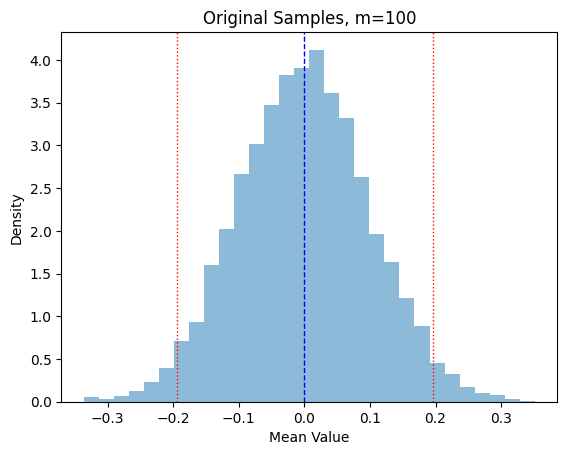

Original Mean: 0.0000, Q1: -0.1937, Q2: 0.1956


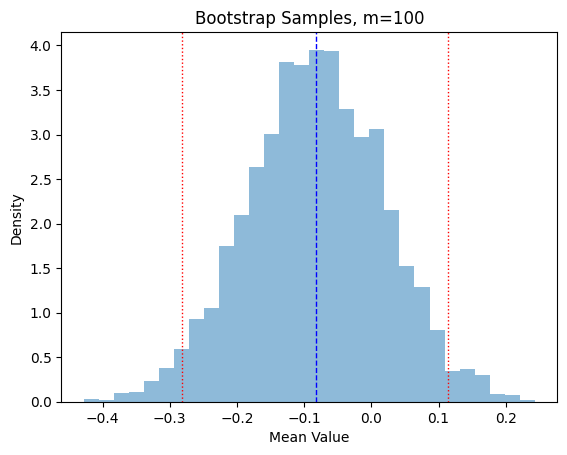

Bootstrap Mean: -0.0823, Q1: -0.2824, Q2: 0.1142


In [151]:
# Your code here
N = 5000

def bootstrap_comparison(m):
    means_original = [np.mean(np.random.normal(0, 1, m)) for _ in range(N)]

    samples = np.random.normal(0, 1, m)
    means_bootstrap = [np.mean(np.random.choice(samples, m, replace=True)) for _ in range(N)]

    plt.figure(0)
    plt.hist(means_original, bins=30, alpha=0.5, label='Original Means', density=True)
    plt.axvline(np.mean(means_original), color='blue', linestyle='dashed', linewidth=1, label='Mean Original')
    plt.axvline(np.quantile(means_original, 0.025), color='red', linestyle='dotted', linewidth=1, label='Q1 Original')
    plt.axvline(np.quantile(means_original, 0.975), color='red', linestyle='dotted', linewidth=1, label='Q2 Original')
    plt.title('Original Samples, m={}'.format(m))
    plt.xlabel('Mean Value')
    plt.ylabel('Density')
    plt.show()
    print(f"Original Mean: {np.mean(means_original):.4f}, Q1: {np.quantile(means_original, 0.025):.4f}, Q2: {np.quantile(means_original, 0.975):.4f}")

    plt.figure(1)
    plt.hist(means_bootstrap, bins=30, alpha=0.5, label='Bootstrap Means', density=True)
    plt.axvline(np.mean(means_bootstrap), color='blue', linestyle='dashed', linewidth=1, label='Mean Bootstrap')
    plt.axvline(np.quantile(means_bootstrap, 0.025), color='red', linestyle='dotted', linewidth=1, label='Q1 Bootstrap')
    plt.axvline(np.quantile(means_bootstrap, 0.975), color='red', linestyle='dotted', linewidth=1, label='Q2 Bootstrap')
    plt.title('Bootstrap Samples, m={}'.format(m))
    plt.xlabel('Mean Value')
    plt.ylabel('Density')
    plt.show()
    print(f"Bootstrap Mean: {np.mean(means_bootstrap):.4f}, Q1: {np.quantile(means_bootstrap, 0.025):.4f}, Q2: {np.quantile(means_bootstrap, 0.975):.4f}")

np.random.seed(42)
bootstrap_comparison(m=20)
bootstrap_comparison(m=100)

## 2. Simulated Annealing

You will implement the simulated annealing algorithm to minimize the **Rastrigin function**:

$$f(x, y) = 20 + x^2 + y^2 - 10(\cos(2\pi x) + \cos(2\pi y)) $$

Steps:

1. Plot the contour map of the Rastrigin function over the range $[-6, 6]$ for both $x$ and $y$.

2. Implement simulated annealing with these parameters:
   - Initial temperature: 1
   - Cooling schedule: $T_{i+1} = 0.99 \times T_i$, for $i = 0, 1, \dots, 999$
   - Perform 100 iterations at each temperature (reduce the number of iterations if it takes too long).
   - Starting point:$(-1, -1)$
   - Proposal distribution: Uniform in $[- \delta, \delta]$ centered at the current point for each coordinate.

3. Try two nearby values of $\delta$:
   - One that results in convergence to the global minimum
   - One that fails to converge

4. Plot both trajectories on the same contour plot using different colors.

5. Report the final coordinates found by the algorithm for both $\delta$ values and the function value at those coordinates.


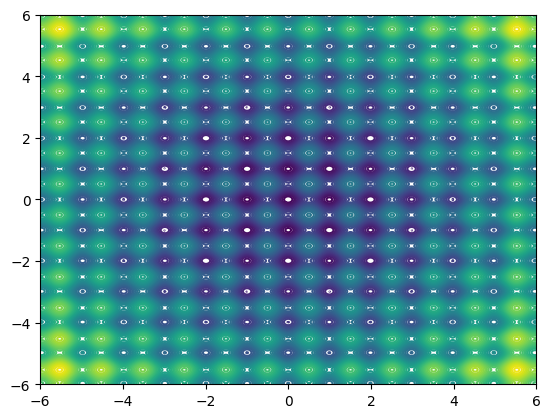

In [152]:
# plot contour lines of Rastrigin function
def rastrigin(x, y):
    return 20 + x**2 + y**2 - 10 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))

def plot_contour():
    x = np.linspace(-6, 6, 400)
    y = np.linspace(-6, 6, 400)
    X, Y = np.meshgrid(x, y)
    Z = rastrigin(X, Y)

    plt.contour(X, Y, Z, levels=50)

plot_contour()
plt.show()

Optimal point found at x: -0.9957, y: -0.9952 with value: 1.9900
Optimal point found at x: -0.0043, y: -0.0004 with value: 0.0036


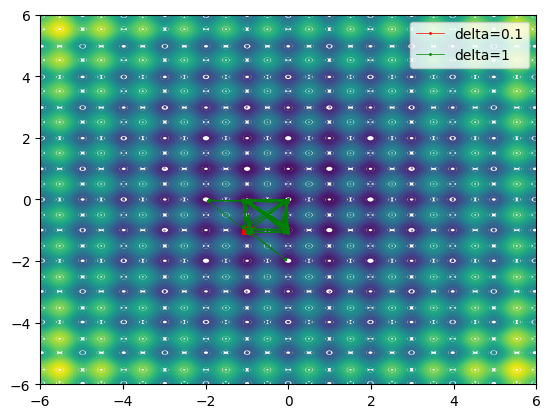

In [153]:
# Simulated Annealing algorithm
def simulated_annealing(x0=-1, y0=-1, func = rastrigin, T0=1, alpha=0.99, n_iter=100, delta=0.1):
  temps = [T0 * 0.99**i for i in range(1000)]
  path = [(x0, y0)]
  x, y = x0, y0
  for t in temps:
    for _ in range(n_iter):
      x_new = x0 + np.random.uniform(-delta, delta)
      y_new = y0 + np.random.uniform(-delta, delta)
      f_new = func(x_new, y_new)
      f_old = func(x, y)
      if f_new <= f_old or np.random.uniform(0, 1) < np.exp(-(f_new - f_old) / t):
        x, y = x_new, y_new
      path.append((x, y))
  return x, y, path

plot_contour()

np.random.seed(42)
x_opt, y_opt, path = simulated_annealing(delta=0.1)
print(f"Optimal point found at x: {x_opt:.4f}, y: {y_opt:.4f} with value: {rastrigin(x_opt, y_opt):.4f}")
plt.plot(*zip(*path), marker='o', markersize=1, linewidth=0.5, color='red', label='delta=0.1')
x_opt, y_opt, path = simulated_annealing(delta=1)
print(f"Optimal point found at x: {x_opt:.4f}, y: {y_opt:.4f} with value: {rastrigin(x_opt, y_opt):.4f}")
plt.plot(*zip(*path), marker='o', markersize=1, linewidth=0.5, color='green', label='delta=1')
plt.legend(loc='upper right')
plt.show()


## 3. Cross-Entropy Method

In this problem, you will implement the **cross-entropy method** to minimize the **Rastrigin function**. 

Steps:

1. Implement the cross-entropy method using the following parameters:
   - Sample size: 100  
   - Elite sample count: 10  
     From each set of 100 samples, select the 10 with the lowest function values to update the distribution.
   - Number of iterations: 10,000  
     If computation is too slow, feel free to reduce this. You do not need to implement a convergence check.
   - Initial mean: \((-1, -1)\)
   - Proposal distribution:  
     Start with a Gaussian (normal) distribution centered at the initial mean and with standard deviation `std_dev`.      At each iteration, generate 100 samples from the proposal distribution using:  
     ```python
     np.random.normal(loc=mean, scale=std, size=(sample_size, 2))
     ```


2. Try two close values of `std_dev`:
   - One that leads the algorithm to successfully converge to the global minimum.
   - One that fails to converge.

3. Plot the two trajectories on the same contour plot of the Rastrigin function. Use different colors for the two trajectories.

4. Report the final coordinates of the minimum found by the algorithm for both `std_dev` values, as well as the function value at that point.


Optimal point found at x: 0.0000, y: 0.0000 with value: 0.0000
Optimal point found at x: -0.0000, y: -0.9950 with value: 0.9950


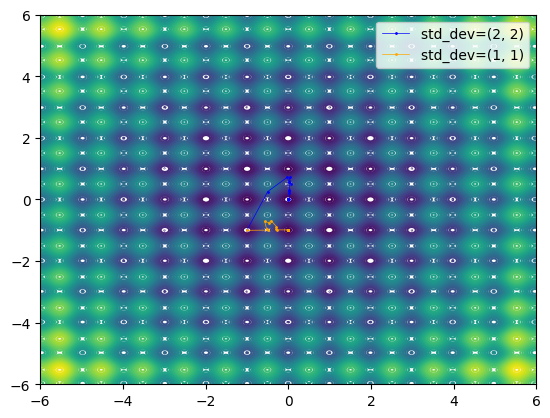

In [154]:
def cross_entropy_method(func, x0, y0, pop_size=100, elite_size=10, n_iter=10000, std_dev=1):
  path = [(x0, y0)]
  x, y = x0, y0
  for _ in range(n_iter):
    samples = np.random.normal(loc=(x, y), scale=std_dev, size=(pop_size, 2))
    fitness = np.array([func(s[0], s[1]) for s in samples])
    elite_indices = np.argsort(fitness)[:elite_size]
    elite_samples = samples[elite_indices]
    x, y = np.mean(elite_samples, axis=0)
    std_dev = np.std(elite_samples, axis=0)
    path.append((x, y))
  return x, y, path

plot_contour()

np.random.seed(42)
x, y, path = cross_entropy_method(func=rastrigin, x0=-1, y0=-1, std_dev=(2, 2))
print(f"Optimal point found at x: {x:.4f}, y: {y:.4f} with value: {rastrigin(x, y):.4f}")
plt.plot(*zip(*path), marker='o', markersize=1, linewidth=0.5, color='blue', label='std_dev=(2, 2)')

x, y, path = cross_entropy_method(func=rastrigin, x0=-1, y0=-1, std_dev=(1, 1))
print(f"Optimal point found at x: {x:.4f}, y: {y:.4f} with value: {rastrigin(x, y):.4f}")
plt.plot(*zip(*path), marker='o', markersize=1, linewidth=0.5, color='orange', label='std_dev=(1, 1)')
plt.legend(loc='upper right')
plt.show()